The goal here is to look at the i-band 5$\sigma$ depth changes between v1.3 and v1.4. we consider the median depth in all non-dd visits vs. those in eg-footprint area (which is defined as the survey area that passes a depth cut and an EBV cut, and has coverage in all siz bands).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
import healpy as hp
from copy import deepcopy

In [2]:
%matplotlib inline

In [3]:
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [5]:
outdir_plots = '/global/homes/a/awan/LSST/lsstRepos/ObsStrat/postwp/results-5sigma-depth'

#### read in the Y10 i-band 5$\sigma$ depth data

In [6]:
versions = ['v1.3', 'v1.4']

data_dict = {}
for version in versions:
    data_dict[version] = {}
    path = '/global/cscratch1/sd/awan/lsst_output/post-wp_%s_five-sigma-depth' % version
    for file in [ f for f in os.listdir(path) if f.endswith('.npz')]:    
        dbname = file.split('_mean')[0]
        data_dict[version][dbname] = metricBundles.createEmptyMetricBundle()
        data_dict[version][dbname].read('%s/%s' % (path, file))

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slic

#### read in the eg-footprint mask
currently running the lss-fom runs for v1.4 that produce the explicit eg-footprint mask. in the meantime, we can use the depth-in-eg data to get the mask for v1.4

In [7]:
limi_map = {'v1.3': 26.0, 'v1.4': 25.9}

In [8]:
eg_mask_dict = {}
for version in versions:
    eg_mask_dict[version] = {}
    if version == 'v1.3':
        path = '/global/cscratch1/sd/awan/lsst_output/post_wp_output/lss_fom/eg-footprint-mask'
        for file in [ f for f in os.listdir(path) if f.endswith('.txt') and f.__contains__('i>%s' % limi_map[version])]:    
            dbname = file.split('_yr10')[0].split('eg-footprint_')[-1]
            #print('reading %s for %s' % (file, dbname))
            eg_mask_dict[version][dbname] = np.genfromtxt('%s/%s' % (path, file)).astype('bool')
    else:
        path = '/global/cscratch1/sd/awan/lsst_output/post_wp_output_v1.4_-0.1cuts/bundle_data'
        for file in [ f for f in os.listdir(path) if f.endswith('.npz') and f.startswith('depth_in') and f.__contains__('limi%s' % limi_map[version])]:    
            dbname = file.split('_i-band')[0].split('_eg_')[-1]
            #print('reading %s for %s' % (file, dbname))
            eg_mask_dict[version][dbname] = np.load('%s/%s' % (path, file))['mask']

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_19-dev/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


<Figure size 720x432 with 0 Axes>

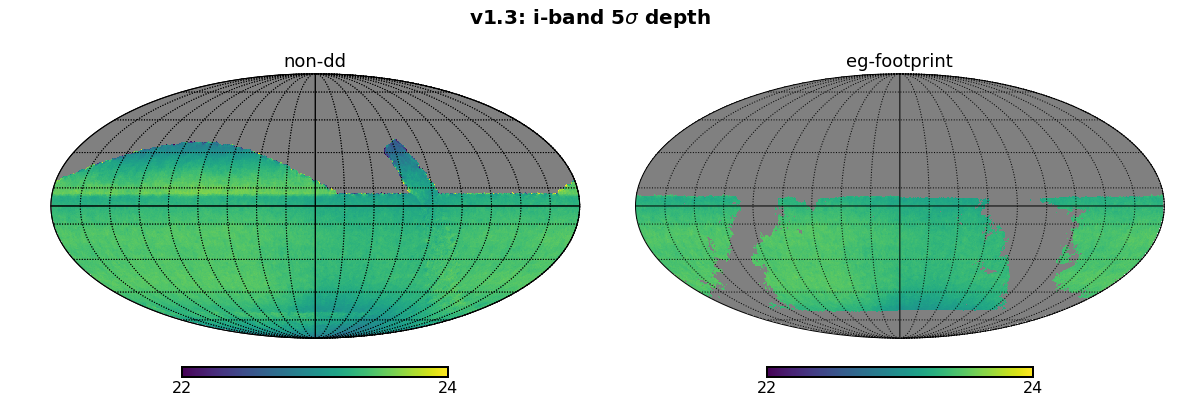

<Figure size 720x432 with 0 Axes>

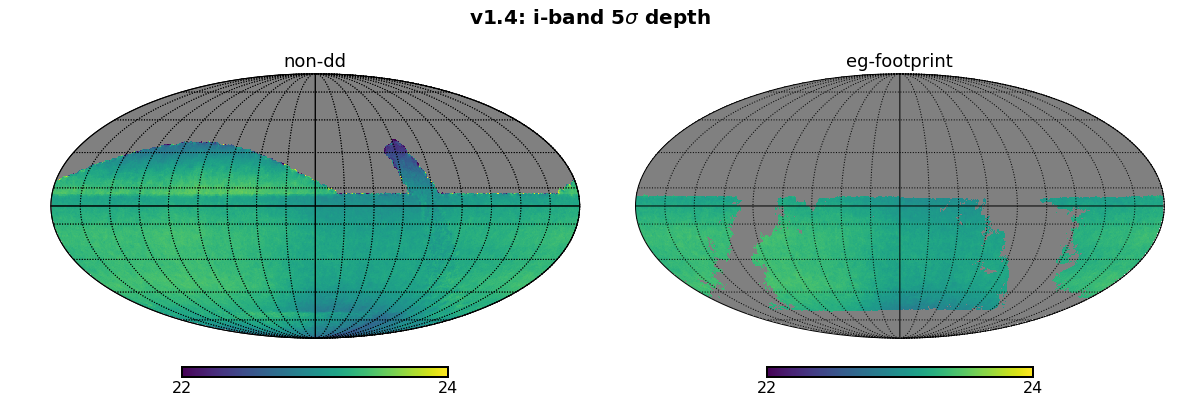

In [9]:
colormin, colormax = 22, 24
# plot things out for the baseline
for version in versions:
    plt.clf()
    nrows, ncols = 1, 2
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    plt.axes(axes[0])
    
    hp.mollview( data_dict[version]['baseline_%s_10yrs' % version].metricValues ,  min=colormin, max=colormax,
                flip='astro', rot=(0,0,0) , hold=True, title='non-dd')
    hp.graticule(dpar=20, dmer=20, verbose=False)

    plt.axes(axes[1])
    bundle = deepcopy( data_dict[version]['baseline_%s_10yrs' % version] )
    bundle.metricValues.mask = eg_mask_dict[version]['baseline_%s_10yrs' % version]

    hp.mollview( bundle.metricValues, min=colormin, max=colormax,
                flip='astro', rot=(0,0,0) , hold=True, title='eg-footprint')
    hp.graticule(dpar=20, dmer=20, verbose=False)

    plt.gcf().set_size_inches(20, 10)
    plt.suptitle(r'%s: i-band 5$\sigma$ depth' % version, y=0.7, fontsize=20, fontweight='bold')
    #filename = 'compare-skymaps_%s.png' % (version)
    #plt.savefig('%s/%s'%(outdir_plots, filename), format= 'png', bbox_inches='tight')
    
    plt.show()

#### now lets create box plots for v1.3, 1.4 depths

saved plot_5sigma-depth_v1.3.png


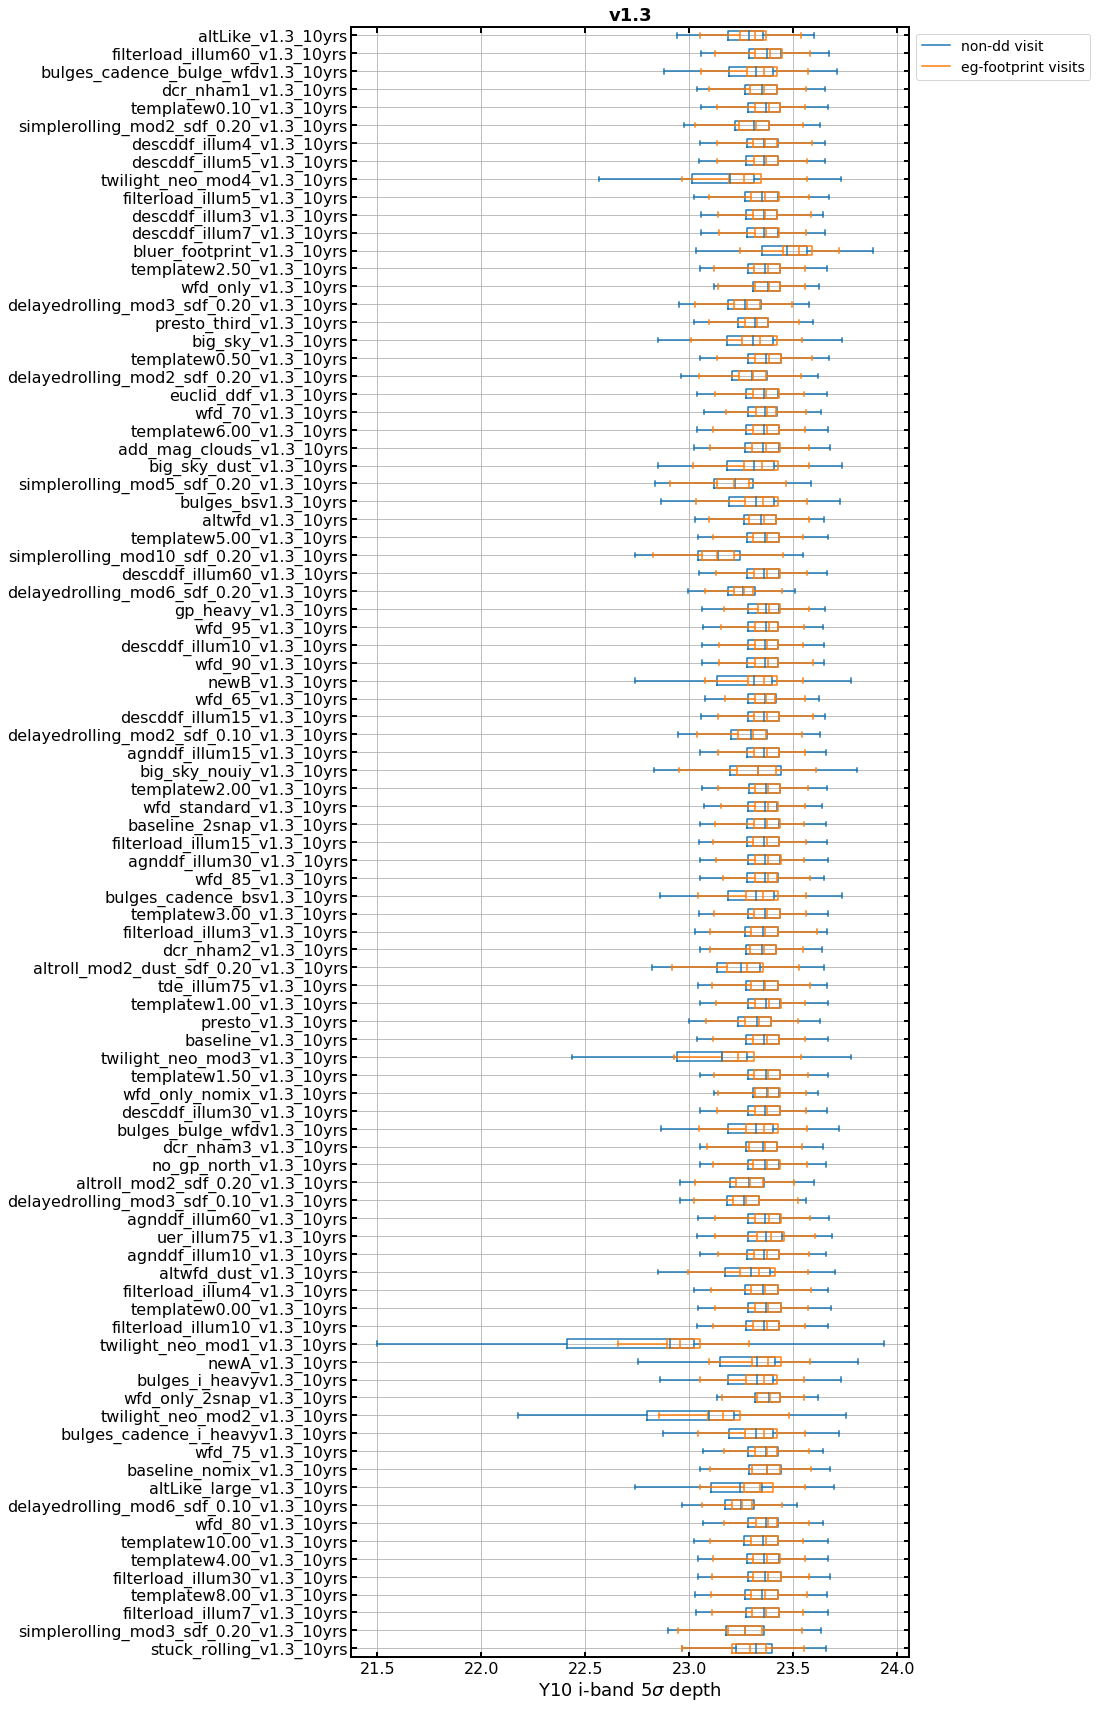

saved plot_5sigma-depth_v1.4.png


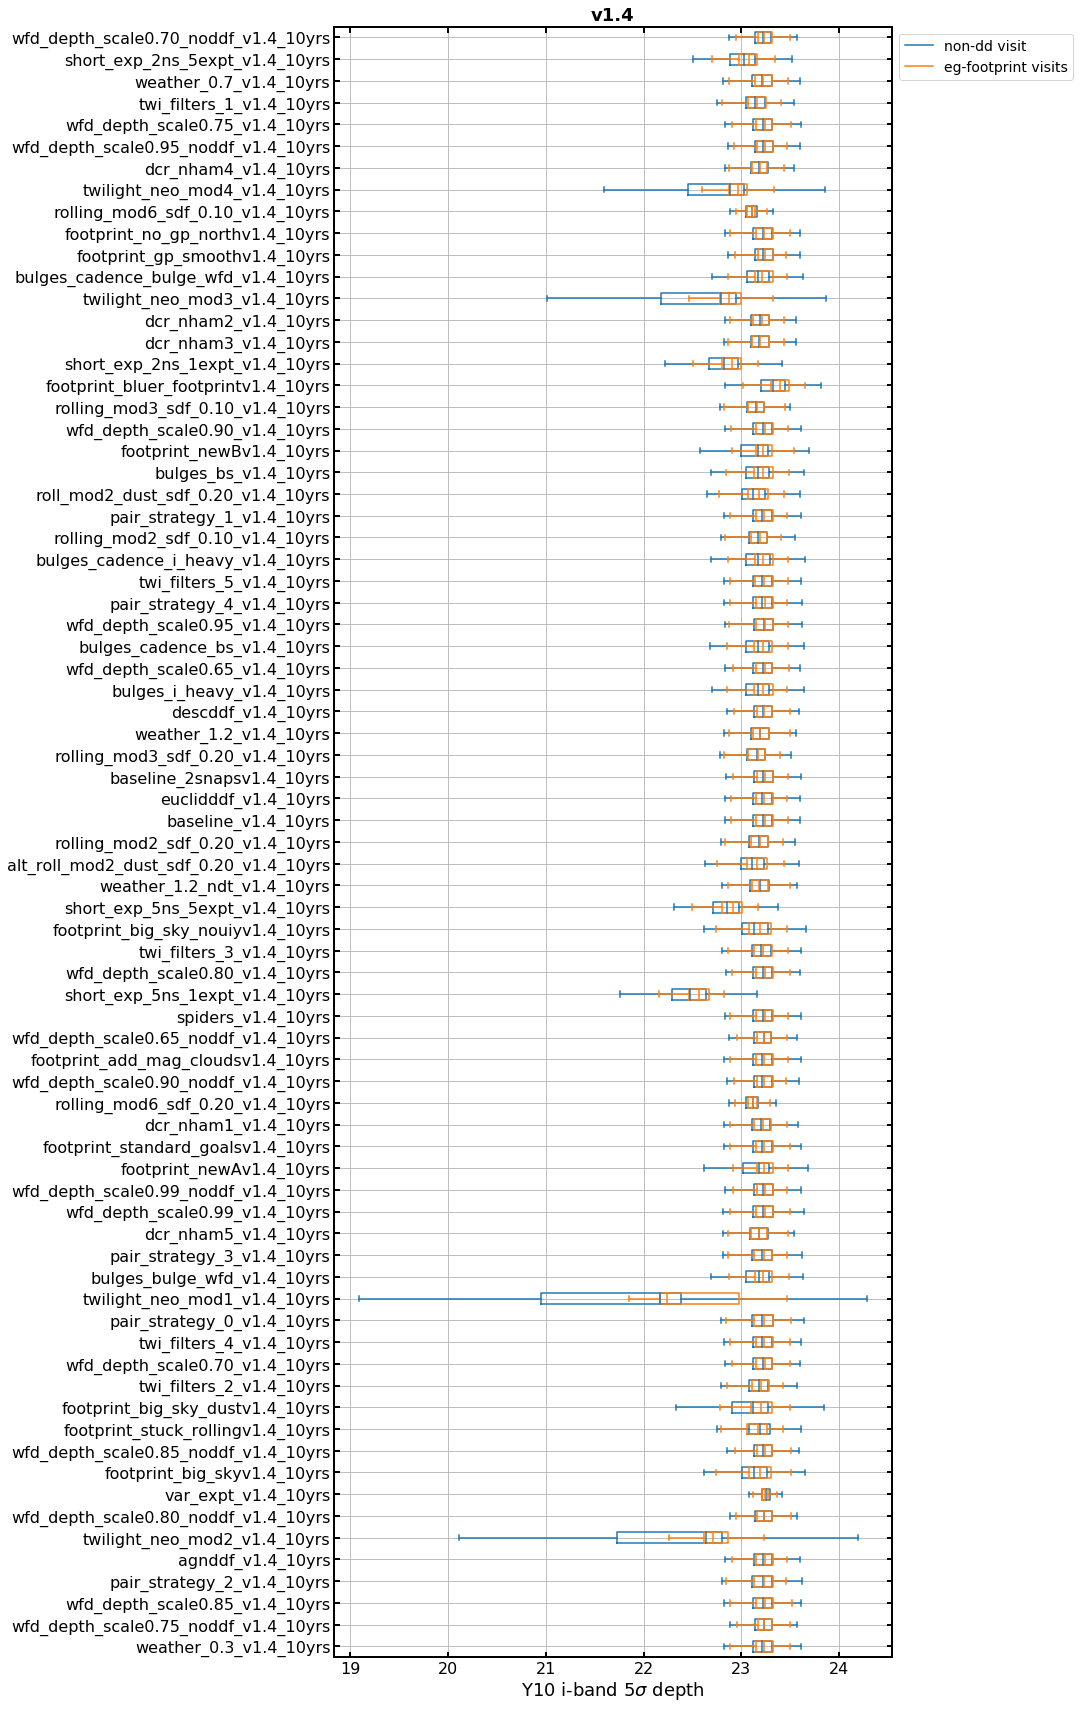

In [10]:
for version in versions:
    db_list = []
    for i, db in enumerate( list(data_dict[version].keys()) ):
        ind_nondd = np.where( data_dict[version][db].metricValues.mask == False)[0]
        ind_eg = np.where( eg_mask_dict[version][db] == False )[0]
        if i == 0:
            stack_nondd = [ data_dict[version][db].metricValues.data[ind_nondd] ]
            stack_eg = [ data_dict[version][db].metricValues.data[ind_eg] ]
        else:
            #stack = np.vstack( [stack, data_dict[version][db].metricValues.data[ind_in_survey] ] )
            stack_nondd.append( data_dict[version][db].metricValues.data[ind_nondd]  )
            stack_eg.append( data_dict[version][db].metricValues.data[ind_eg]  )
        db_list.append( db )
        
        if False:
            # attempt to add median depths to the plot but can't get it to work properly
            med = np.median(data_dict[version][db].metricValues.data[ind_nondd])
            std = np.std(data_dict[version][db].metricValues.data[ind_nondd])
            q1 = np.percentile(data_dict[version][db].metricValues.data[ind_nondd], 25)
            plt.text(x=q1-0.2, y=i+1.2, s='median %.2f' % med, horizontalalignment='left', size=10, color='#1f77b4')

            med = np.median(data_dict[version][db].metricValues.data[ind_eg])
            std = np.std(data_dict[version][db].metricValues.data[ind_eg])
            q3 = np.percentile(data_dict[version][db].metricValues.data[ind_eg], 100)
            plt.text(x=q3+0.2, y=i+1.2, s='median %.2f' % med, horizontalalignment='right', size=10, color='#ff7f0e')

    # plot
    box1 = plt.boxplot(stack_nondd, vert=False, sym='')
    box2 = plt.boxplot(stack_eg, vert=False, sym='')
    # plot details
    for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color='#1f77b4', linewidth=1.5)
        plt.setp(box2[item], color='#ff7f0e', linewidth=1.5)
    # legend
    plt.legend([box1["boxes"][0], box2["boxes"][0]], ['non-dd visit', 'eg-footprint visits'], bbox_to_anchor=(1,1))
    # xlabel
    plt.xlabel(r'Y10 i-band 5$\sigma$ depth')
    # title
    plt.title(version, fontweight='bold')
    # ylabels
    plt.gca().set_yticklabels( db_list ) #, rotation=90)
    # figure size
    plt.gcf().set_size_inches(10, 30)
    # save fig
    fname = 'plot_5sigma-depth_%s.png' % version
    plt.savefig('%s/%s' % (outdir_plots, fname), format= 'png', bbox_inches='tight')
    print('saved %s' % fname)
    plt.show()

#### now lets compare v1.3 vs 1.4 median depth for some of the dbs

In [11]:
# mapping between a subset
mapper = {'big_sky_dust_v1.3_10yrs': 'footprint_big_sky_dustv1.4_10yrs',
          'newB_v1.3_10yrs': 'footprint_newBv1.4_10yrs',
            'twilight_neo_mod3_v1.3_10yrs': 'twilight_neo_mod3_v1.4_10yrs',
            'wfd_75_v1.3_10yrs': 'wfd_depth_scale0.75_noddf_v1.4_10yrs',
            'baseline_2snap_v1.3_10yrs': 'baseline_2snapsv1.4_10yrs',
            'bulges_cadence_bulge_wfdv1.3_10yrs': 'bulges_cadence_bulge_wfd_v1.4_10yrs',
            'bulges_bulge_wfdv1.3_10yrs': 'bulges_bulge_wfd_v1.4_10yrs',
            'twilight_neo_mod1_v1.3_10yrs': 'twilight_neo_mod1_v1.4_10yrs',
            'wfd_95_v1.3_10yrs': 'wfd_depth_scale0.95_v1.4_10yrs',
            'wfd_70_v1.3_10yrs': 'wfd_depth_scale0.70_v1.4_10yrs',
            'euclid_ddf_v1.3_10yrs': 'euclidddf_v1.4_10yrs',
            'no_gp_north_v1.3_10yrs': 'footprint_no_gp_northv1.4_10yrs',
            'dcr_nham1_v1.3_10yrs': 'dcr_nham1_v1.4_10yrs',
            'bluer_footprint_v1.3_10yrs': 'footprint_bluer_footprintv1.4_10yrs',
            'wfd_standard_v1.3_10yrs': 'footprint_standard_goalsv1.4_10yrs',
            'newA_v1.3_10yrs': 'footprint_newAv1.4_10yrs',
            'twilight_neo_mod4_v1.3_10yrs': 'twilight_neo_mod4_v1.4_10yrs',
            'twilight_neo_mod2_v1.3_10yrs': 'twilight_neo_mod2_v1.4_10yrs',
            'bulges_cadence_bsv1.3_10yrs': 'bulges_cadence_bs_v1.4_10yrs',
            'add_mag_clouds_v1.3_10yrs': 'footprint_add_mag_cloudsv1.4_10yrs',
            'big_sky_nouiy_v1.3_10yrs': 'footprint_big_sky_nouiyv1.4_10yrs',
            'big_sky_v1.3_10yrs': 'footprint_big_skyv1.4_10yrs',
            'wfd_65_v1.3_10yrs': 'wfd_depth_scale0.65_v1.4_10yrs',
            'bulges_bsv1.3_10yrs': 'bulges_bs_v1.4_10yrs',
            'dcr_nham3_v1.3_10yrs': 'dcr_nham3_v1.4_10yrs',
            'stuck_rolling_v1.3_10yrs': 'footprint_stuck_rollingv1.4_10yrs',
            'wfd_85_v1.3_10yrs': 'wfd_depth_scale0.85_v1.4_10yrs',
            'bulges_i_heavyv1.3_10yrs': 'bulges_i_heavy_v1.4_10yrs',
            'wfd_80_v1.3_10yrs': 'wfd_depth_scale0.80_v1.4_10yrs',
            'bulges_cadence_i_heavyv1.3_10yrs': 'bulges_cadence_i_heavy_v1.4_10yrs',
            'baseline_v1.3_10yrs': 'baseline_v1.4_10yrs',
            'wfd_90_v1.3_10yrs': 'wfd_depth_scale0.90_v1.4_10yrs',
            'dcr_nham2_v1.3_10yrs': 'dcr_nham2_v1.4_10yrs',
         }

In [12]:
# calculate the median depths
med_depth_dict = {'v1.3': [], 'v1.4': []}
med_depth_eg_dict = {'v1.3': [], 'v1.4': []}
for db in mapper:
    dbs_map = {'v1.3': db, 'v1.4': mapper[db]}
    for version in dbs_map:
        #print(version, dbs_map[version])
        ind_in_survey = np.where( data_dict[version][dbs_map[version]].metricValues.mask == False)[0]
        med_depth_dict[version].append( np.median( data_dict[version][dbs_map[version]].metricValues.data[ind_in_survey] ) )

        ind_in_survey = np.where( eg_mask_dict[version][dbs_map[version]] == False )[0]
        med_depth_eg_dict[version].append( np.median( data_dict[version][dbs_map[version]].metricValues.data[ind_in_survey] ) )

<Figure size 720x432 with 0 Axes>

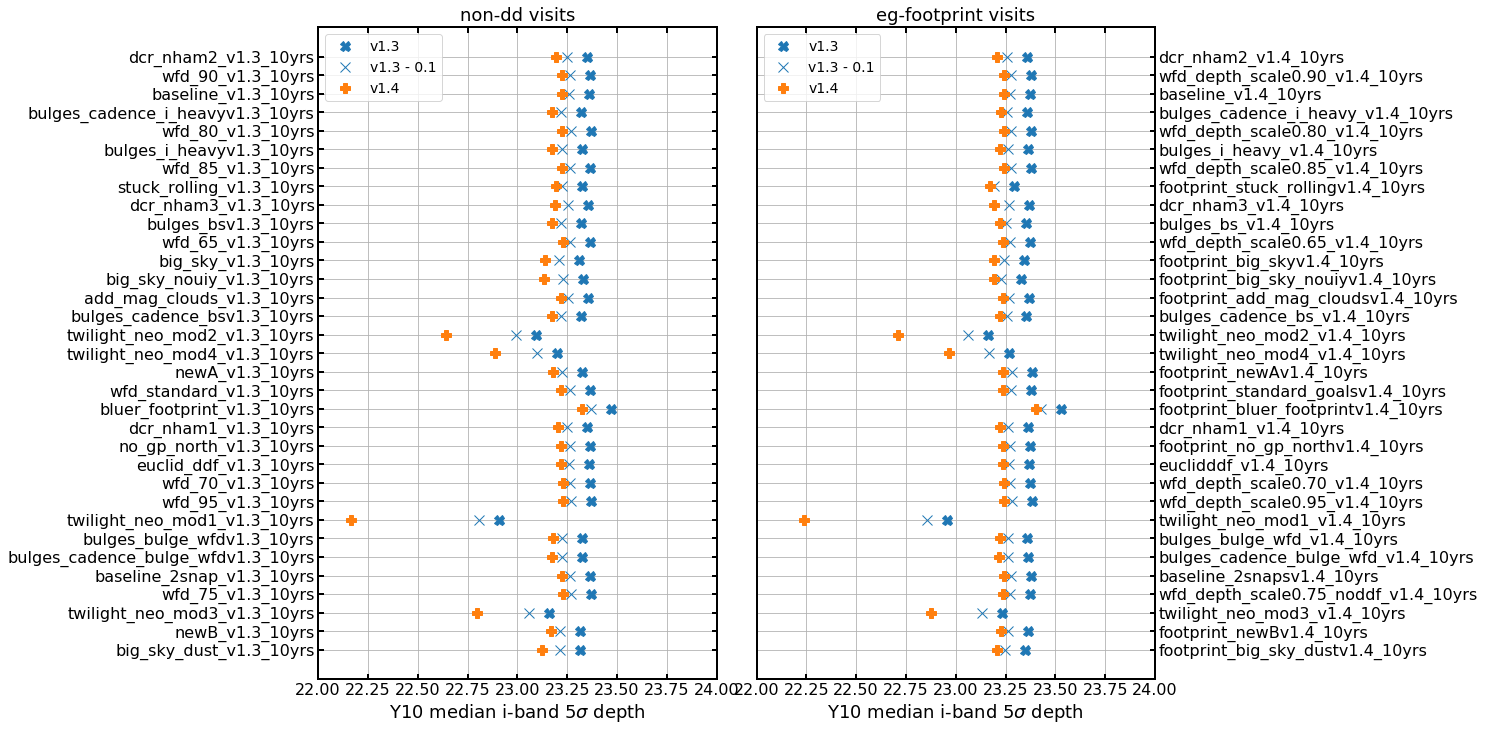

In [13]:
ndbs = len(med_depth_dict['v1.3'])

plt.clf()
nrows, ncols = 1, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax = axes[0]
version = 'v1.3'
p = ax.plot(med_depth_dict[version], range(ndbs), 'X', markersize=10, label=version)
ax.plot( np.array( med_depth_dict[version] ) - 0.1, range(ndbs), 'x', markersize=10, label='v1.3 - 0.1', color=p[0].get_color())

version = 'v1.4'
ax.plot(med_depth_dict[version], range(ndbs), 'P', markersize=10, label=version)

ax.set_title('non-dd visits')

ax = axes[1]
version = 'v1.3'
p = ax.plot(med_depth_eg_dict[version], range(ndbs), 'X', markersize=10, label=version)
ax.plot( np.array( med_depth_eg_dict[version] ) - 0.1, range(ndbs), 'x', markersize=10, label='v1.3 - 0.1', color=p[0].get_color())

version = 'v1.4'
ax.plot(med_depth_eg_dict[version], range(ndbs), 'P', markersize=10, label=version)

ax.set_title('eg-footprint visits')

for i, ax in enumerate( axes ):
    ax.set_xlim(22, 24)
    ax.set_xlabel(r'Y10 median i-band 5$\sigma$ depth')
    ax.legend(loc='upper left')
    ax.set_yticks( range(ndbs) )
    if i == 0:
        ax.set_yticklabels( mapper.keys() ) #, rotation=90)
    else:
        ax.set_yticklabels( mapper.values() ) #, rotation=90)
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
        
fig.set_size_inches(15, 12)
filename = 'plot_5sigma-depth_v1.3-vs-v1.4_subset.png'
plt.savefig('%s/%s' % (outdir_plots, filename), format= 'png', bbox_inches='tight')

plt.show()